# NOMBRE: ALEX BENAVIDEZ 
# CARRERA: INGENIERIA EN SISTEMAS 
# MATERIA: SIMULACION
# PROFESOR: DIEGO QUISI 

In [34]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from facebook_scraper import get_posts

### Obtenemos la informacion de Facebook de los candidatos

In [51]:
posts = [] 
# Obtenemos la información de las publicaciones
for post in get_posts('yakuperezoficial', pages=10):
        post['Word count'] = len(post['text'])
        posts.append(post)      

for post in get_posts('LassoGuillermo', pages=10):
        post['Word count'] = len(post['text'])
        posts.append(post)   
#print(posts)
fb_posts = pd.DataFrame(posts)

In [53]:
# Ahora veamos algunas estadísticas de nuestros datos
fb_posts.describe()

,likes,comments,shares,Word count
count,76.000000,76.000000,76.000000,76.000000
mean,1629.473684,338.184211,124.592105,229.552632
std,748.562257,387.008965,291.489882,104.305244
min,434.000000,32.000000,0.000000,0.000000
25%,1161.750000,84.500000,0.000000,161.500000
50%,1542.000000,181.000000,0.000000,231.500000
75%,1954.000000,398.750000,0.000000,285.500000
max,4934.000000,1833.000000,1103.000000,518.000000


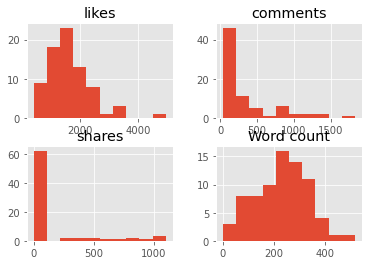

In [54]:
# Visualizamos rápidamente las caraterísticas de entrada
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

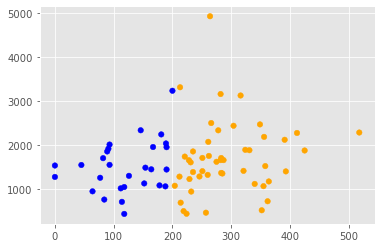

<Figure size 360x360 with 0 Axes>

In [55]:
filtered_data = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['likes'] <= 80000)]

colores=['orange','blue']
tamanios=[30,20]

f1 = filtered_data['Word count'].values
f2 = filtered_data['likes'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0]) 
plt.figure(figsize=(5,5))
plt.show()



### Realizamos la regresion lineal simple

In [56]:
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['likes'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [1.4653123]
Independent term: 
 1293.107389201612
Mean squared error: 529919.86
Variance score: 0.04


### Visualizamos La recta obtenida

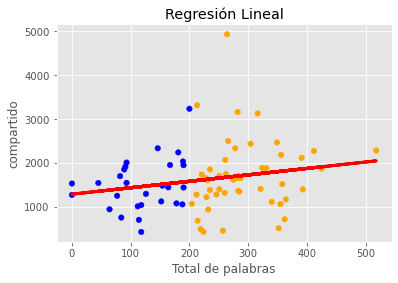

In [57]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Total de palabras')
plt.ylabel('compartido')
plt.title('Regresión Lineal')

plt.show()

### Realizamos la primera prediccion

### Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos “compartir” obtendrá un articulo sobre ML de 2000 palabras

In [58]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

4223


### Regresion lineal con variables variables

In [59]:
suma = (filtered_data["shares"] + filtered_data['comments'].fillna(0)) 
 
dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['likes'].values

In [60]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [2.06111003 0.34659325]
Mean squared error: 485055.70
Variance score: 0.12


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

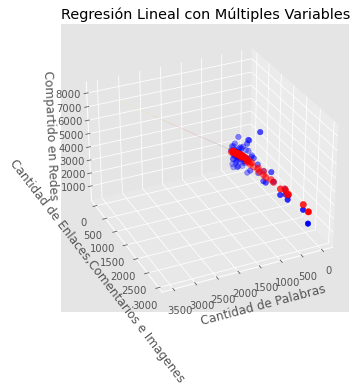

In [61]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

### Realizamos la segunda prediccion

### Veamos ahora, que predicción tendremos para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes.

In [62]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

5125


# Simulacion de proceso de  votacion

In [64]:
import simpy
import random
import matplotlib.pyplot as pp
import random
%matplotlib inline

MAXIMO_VOTANTES = 1
NUMERO_MESA_ELECTORAL = 1
TIEMPO_DE_VOTACION = 5
INTERVALO_TIEMPO_LLEGADA = 3
TIEMPO_DE_SIMULACION = 35
votos = {}
class Votacion(object):

    def __init__(self, environment, numero_mesa_electoral, tiempovotacion):
        self.env = environment
        self.mesa = simpy.Resource(environment, numero_mesa_electoral)
        self.tiempo_votacion = tiempovotacion

    def atencion_al_votante(self, votante):
        yield self.env.timeout(random.randint(TIEMPO_DE_VOTACION - 5, TIEMPO_DE_VOTACION + 5))


def llegada_de_votante(env, nom, Votacion):
    print('Ha llegado el votante: [%s]' % (nom))
    with Votacion.mesa.request() as maquina:
        yield maquina
        print('-- Ha entrado [%s] a sufragar:' % (nom))
        yield env.process(Votacion.atencion_al_votante(nom))
        print('-->La persona [%s] ya terminó de sufragar'%(nom))
        print('-->La persona [%s] ha recibido su certificado de votacion'%(nom))
        print('-->La persona [%s] ha salido del Recinto Electoral.'%(nom))
        votos[nom] = random.randint(1, 3)

def ejecutar_simulacion(env, numero_mesa_electoral, tiempo_de_votacion, intervalo_tiempo):
    votacion = Votacion(env, numero_mesa_electoral, tiempo_de_votacion)
    for i in range(5):
        env.process(llegada_de_votante(env, 'votante-%d' % (i + 1), votacion))

    while True:
        yield env.timeout(random.randint(intervalo_tiempo - 3, intervalo_tiempo + 3))
        i += 1
        env.process(llegada_de_votante(env, 'votante-%d' % (i + 1), votacion))


print('Votacion UPS')

env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUMERO_MESA_ELECTORAL, TIEMPO_DE_VOTACION, INTERVALO_TIEMPO_LLEGADA))

env.run(until=TIEMPO_DE_SIMULACION)

print("Diccionario  de votos:")
print(votos)

Votacion UPS
Ha llegado el votante: [votante-1]
Ha llegado el votante: [votante-2]
Ha llegado el votante: [votante-3]
Ha llegado el votante: [votante-4]
Ha llegado el votante: [votante-5]
-- Ha entrado [votante-1] a sufragar:
-->La persona [votante-1] ya terminó de sufragar
-->La persona [votante-1] ha recibido su certificado de votacion
-->La persona [votante-1] ha salido del Recinto Electoral.
-- Ha entrado [votante-2] a sufragar:
-->La persona [votante-2] ya terminó de sufragar
-->La persona [votante-2] ha recibido su certificado de votacion
-->La persona [votante-2] ha salido del Recinto Electoral.
-- Ha entrado [votante-3] a sufragar:
-->La persona [votante-3] ya terminó de sufragar
-->La persona [votante-3] ha recibido su certificado de votacion
-->La persona [votante-3] ha salido del Recinto Electoral.
-- Ha entrado [votante-4] a sufragar:
-->La persona [votante-4] ya terminó de sufragar
-->La persona [votante-4] ha recibido su certificado de votacion
-->La persona [votante-4] h

# CONCLUSION 

Se a podido obtener la informacion necesaria de la red social facebook de candidatos y realizar regresion lineal para predecir utilizando determinados datos obtenidos. Seguidamente se ha desarrollado una simulacion del proceso de votacion


## Referencias:

[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
[2]: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
[3]: https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
[4]: http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf


- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/- 
- https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf- 
- http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf